In [1]:
import os
os.getcwd()

'C:\\Users\\T420\\Desktop\\UBIQUM\\5 PROJECT\\Quiniela\\notebooks'

In [2]:
import pandas as pd

xl = pd.ExcelFile('../bbdd/FULL_BBDD_with_features.xlsx')
df = xl.parse(xl.sheet_names[0])

In [3]:
df.columns

Index(['TEMPORADA', 'LIGA', 'JORNADA', 'FECHA', 'LOCAL', 'VISITANTE', 'GOL L',
       'GOL V', 'ARBITRO', 'QUINIELA', 'last2_hometeam_w', 'last2_hometeam_d',
       'last2_hometeam_l', 'last5_hometeam_w', 'last5_hometeam_d',
       'last5_hometeam_l', 'last10_hometeam_w', 'last10_hometeam_d',
       'last10_hometeam_l', 'last2_awayteam_w', 'last2_awayteam_d',
       'last2_awayteam_l', 'last5_awayteam_w', 'last5_awayteam_d',
       'last5_awayteam_l', 'last10_awayteam_w', 'last10_awayteam_d',
       'last10_awayteam_l', 'league_local_local_w', 'league_local_local_d',
       'league_local_local_l', 'league_visitor_visitor_w',
       'league_visitor_visitor_d', 'league_visitor_visitor_l', 'h2h_last_10_h',
       'h2h_last_10_d', 'h2h_last_10_a', 'h2h_5_homeaway_h',
       'h2h_5_homeaway_d', 'h2h_5_homeaway_a', 'ref_hometeam_w',
       'ref_hometeam_d', 'ref_hometeam_l', 'ref_awayteam_w', 'ref_awayteam_d',
       'ref_awayteam_l', 'ref_home_home_w', 'ref_home_home_d',
       'ref_home_ho

### "X" Preparing models (create train and test, scaling, filtering information)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

Select what part of the dataframe i want to model and create the final dataframe

In [5]:
jornada_cut = 10
league_selec = 1
selec = df[(df['JORNADA']>=jornada_cut) & (df['LIGA'] == league_selec)]

In [6]:
dummy1 = pd.get_dummies(selec.LOCAL)
dummy2 = pd.get_dummies(selec.VISITANTE)
quiniela = pd.get_dummies(selec.QUINIELA)
dummy2.columns = [i+"_2" for i in dummy2.columns]
selec = pd.concat([selec, dummy1, dummy2, quiniela], axis=1)

In [7]:
x_col = list(selec.columns[[((i[-2:] in ['_l', '_w', '_d', '_h','_a' ]) | (i in dummy1.columns) |  
                             (i in dummy2.columns)) for i in list(selec.columns)]])
X = selec[x_col]
y = selec['X']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

### Apply models (RF, GBT, XGB, ETC)

##### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, cohen_kappa_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_estimators=100, random_state=88)
rfc.fit(X_train, y_train)
predsrfc = rfc.predict(X_test)
print('F1-Score:', round(f1_score(y_test, predsrfc),4), "|", "Kappa:", round(cohen_kappa_score(y_test, predsrfc),4))

F1-Score: 0.0134 | Kappa: 0.0067


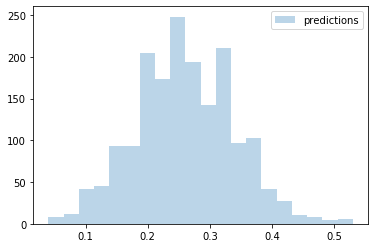

In [16]:
import matplotlib.pyplot as plt
rf = rfc.predict_proba(X_test)[:,1]
plt.hist(rf, bins = 20, alpha = 0.3, label='predictions')
plt.legend()

##### Gradient Boosted Trees

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
predsgbt = clf.predict(X_test)
print('F1-Score:', round(f1_score(y_test, predsgbt),4), "|", "Kappa:", round(cohen_kappa_score(y_test, predsgbt),4))

F1-Score: 0.0045 | Kappa: -0.0034


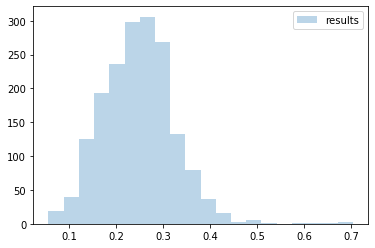

In [18]:
import matplotlib.pyplot as plt
gbt = clf.predict_proba(X_test)[:,1]
plt.hist(gbt, bins = 20, alpha = 0.3, label='results')
plt.legend()

##### XGB

In [19]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
clf.fit(X_train, y_train)
predsxgb = clf.predict(X_test)
print('F1-Score:', round(f1_score(y_test, predsxgb),4), "|", "Kappa:", round(cohen_kappa_score(y_test, predsxgb),4))

F1-Score: 0.0 | Kappa: -0.0056


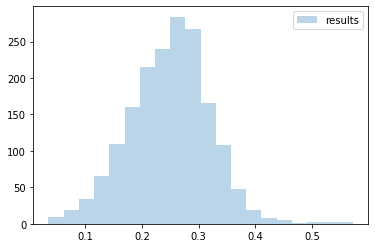

In [20]:
import matplotlib.pyplot as plt
xgb = clf.predict_proba(X_test)[:,1]
plt.hist(xgb, bins = 20, alpha = 0.3, label='results')
plt.legend()

##### Extra Trees Classifier

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
predsxtc = clf.predict(X_test)
print('F1-Score:', round(f1_score(y_test, predsxtc),4), "|", "Kappa:", round(cohen_kappa_score(y_test, predsxtc),4))

F1-Score: 0.0261 | Kappa: 0.0077


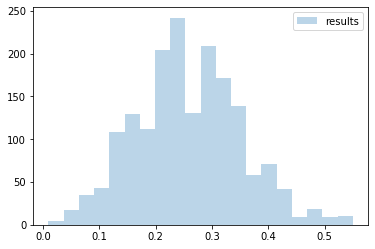

In [22]:
import matplotlib.pyplot as plt
etc = clf.predict_proba(X_test)[:,1]
plt.hist(etc, bins = 20, alpha = 0.3, label='results')
plt.legend()

##### Extra Trees Classifier

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)
predslog = clf.predict(X_test)
print('F1-Score:', round(f1_score(y_test, predslog),4), "|", "Kappa:", round(cohen_kappa_score(y_test, predslog),4))

F1-Score: 0.0045 | Kappa: -0.0023


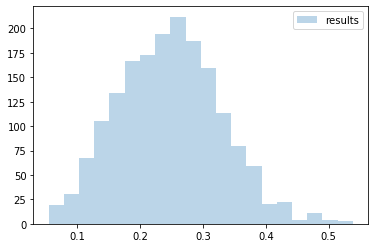

In [24]:
import matplotlib.pyplot as plt
etc = clf.predict_proba(X_test)[:,1]
plt.hist(etc, bins = 20, alpha = 0.3, label='results')
plt.legend()